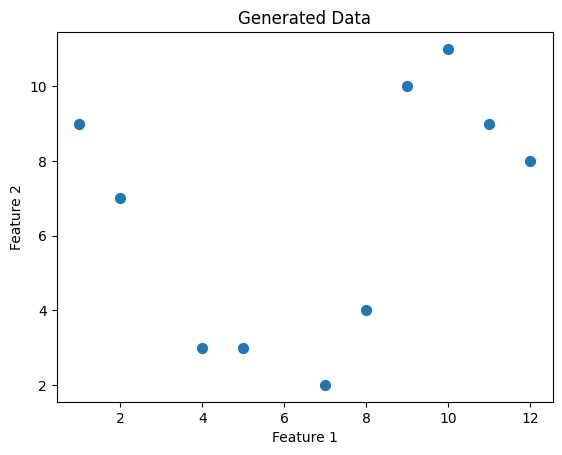

[2 2 0 0 0 0 1 1 1 1]
[[ 6.   3. ]
 [10.5  9.5]
 [ 1.5  8. ]]


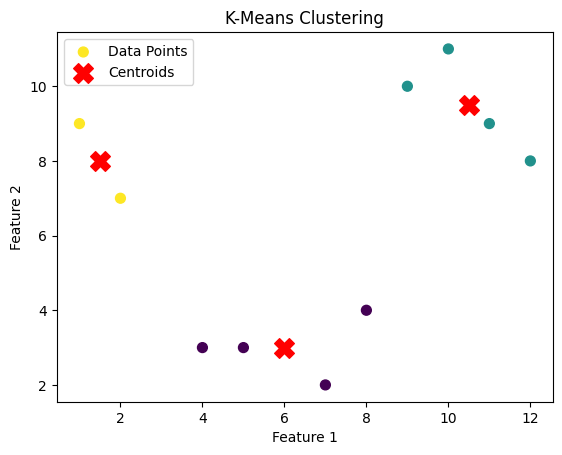

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = np.array([
    [1, 9],
    [2, 7],
    [4, 3],
    [5, 3],
    [7, 2],
    [8, 4],
    [10, 11],
    [11, 9],
    [9, 10],
    [12, 8]
])

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Data")
plt.show()

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Get the cluster labels and centroids
y_kmeans = kmeans.labels_
print(y_kmeans)
centroids = kmeans.cluster_centers_
print(centroids)

# Plot the data points with their cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, label="Data Points")

# Mark the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label="Centroids")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()


**Input:** Dataset `X` with `n_samples` and `n_features`, number of clusters `k`, maximum iterations `max_iters`

**Output:** Cluster assignments for each data point and centroids for each cluster

---

**Function:** `euclidean_distance(x1, x2)`
1. Calculate the Euclidean distance:
   \[
   \text{distance} = \sqrt{\sum{(x1 - x2)^2}}
   \]
2. Return `distance`

---

**Class:** `KMeans`
1. **Initialize:**
   - Number of clusters `k`
   - Maximum iterations `max_iters`
   - Create an empty list of clusters
   - Initialize centroids as an empty list

---

**Method:** `fit(X)`
1. Store `X` as instance variable and retrieve its dimensions (`n_samples`, `n_features`)
2. Randomly select `k` data points as initial centroids
3. Repeat up to `max_iters` times:
   - Assign each data point to the closest centroid (creating clusters)
   - Calculate new centroids as the mean of all points in each cluster
   - If centroids do not change (convergence), stop iterating
4. Return cluster assignments

---

**Method:** `_create_clusters(centroids)`
1. Initialize `clusters` as an empty list of `k` lists
2. For each data point in `X`:
   - Compute the distance to each centroid
   - Assign the data point to the closest centroid
3. Return `clusters`

---

**Method:** `_closest_centroid(sample, centroids)`
1. Calculate the distance of `sample` to each centroid
2. Return the index of the centroid with the smallest distance

---

**Method:** `_get_centroids(clusters)`
1. Initialize a zero matrix for centroids with dimensions `(k, n_features)`
2. For each cluster:
   - Calculate the mean of all data points in the cluster
   - Assign the mean as the new centroid
3. Return updated centroids

---

**Method:** `_is_converged(centroids_old, centroids)`
1. For each pair of old and new centroids:
   - Calculate the Euclidean distance
2. If the sum of all distances is zero, return `True` (converged)
3. Otherwise, return `False`

---

**Method:** `plot()`
1. Create a scatter plot for each cluster
2. Highlight centroids with a distinct marker
3. Show the plot

---

**Main Execution:**
1. Create a synthetic dataset `X` (or input dataset)
2. Initialize `KMeans` with desired `k` and `max_iters`
3. Fit the dataset to the model to calculate centroids and cluster assignments
4. Visualize the results:
   - Scatter plot of data points colored by cluster assignments
   - Mark centroids on the plot


(10, 2)


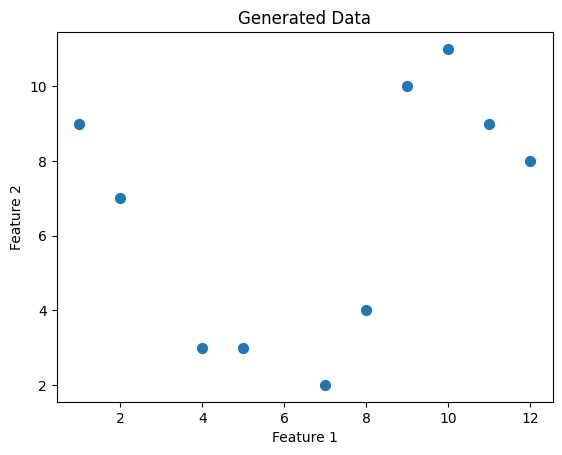

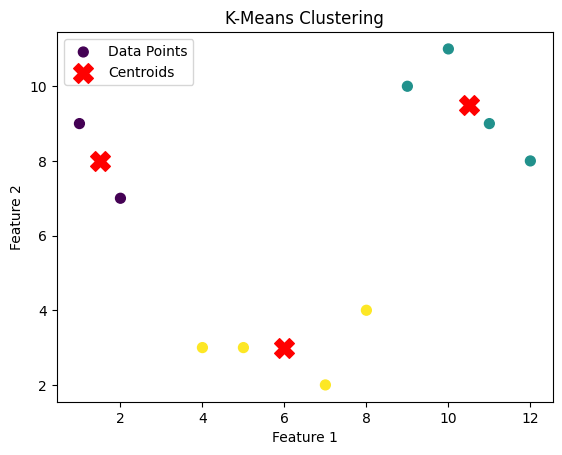

[[ 1.5  8. ]
 [10.5  9.5]
 [ 6.   3. ]]
[0. 0. 2. 2. 2. 2. 1. 1. 1. 1.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

class KMeans:
  def __init__(self, k=5, max_iters=100):
    self.k = k
    self.max_iters = max_iters

    #list of sample indices for each cluster
    self.clusteres = [[] for _ in range(self.k)]

    # the centers (mean vector) for each cluster
    self.centroids = []

  def fit(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    # initialize
    random_sample_idxs = np.random.choice(self.n_samples, self.k, replace=False)
    # print(random_sample_idxs)
    self.centroids = [self.X[idx] for idx in random_sample_idxs]

    #optimize clusters
    for _ in range(self.max_iters):
      # assign samples to closest centroids (create clusters)
      self.clusteres = self._create_clusters(self.centroids)

      # self.plot()

      #calculate new centroids from the clusters
      centroids_old = self.centroids
      self.centroids = self._get_centroids(self.clusteres)

      #check if clusters have changed
      if self._is_converged(centroids_old, self.centroids):
        break

      # self.plot()

    #classify samples as the index of their clusters
    return self._get_cluster_labels(self.clusteres)

  def _get_cluster_labels(self, clusteres):
    labels = np.empty(self.n_samples)

    for cluster_idx, cluster in enumerate(clusteres):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx

    return labels

  def _create_clusters(self, centroids):
    #assign the samples to the closest centroids
    clusters = [[] for _ in range(self.k)]
    for idx, sample in enumerate(self.X):
      centroid_idx = self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self, sample, centroids):
    distances = [euclidean_distance(sample, point) for point in centroids]
    closest_idx = np.argmin(distances)
    return closest_idx

  def _get_centroids(self, clusteres):
    # assign mean value of clusters to centroids
    centroids = np.zeros((self.k, self.n_features))
    # print(centroids.shape)
    for cluster_idx, cluster in enumerate(clusteres):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids

  def _is_converged(self, centroids_old, centroids):
    # distances between old and new centroids, for all centroids
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
    return sum(distances) == 0

  def plot(self):
    fig, ax = plt.subplots(figsize=(12, 8))

    for i, index in enumerate(self.clusteres):
      point = self.X[index].T
      ax.scatter(*point)

    for point in self.centroids:
      ax.scatter(*point, marker="x", color="black", linewidth=2)

    plt.show()


from sklearn.datasets import make_blobs
# np.random.seed(42)
# X, y = make_blobs(
#     centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
# )

X = np.array([
    [1, 9],
    [2, 7],
    [4, 3],
    [5, 3],
    [7, 2],
    [8, 4],
    [10, 11],
    [11, 9],
    [9, 10],
    [12, 8]
])

print(X.shape)

clusters = 3

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Data")
plt.show()

k = KMeans(k=clusters, max_iters=100)
y_pred = k.fit(X)

# k.plot()

# Plot the data points with their cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, label="Data Points")

# Mark the centroids
plt.scatter(k.centroids[:, 0], k.centroids[:, 1], s=200, c='red', marker='X', label="Centroids")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

print(k.centroids)
print(y_pred)